In [69]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn import preprocessing

In [70]:
data = pd.read_csv('data.csv', header =None)

In [71]:
data = data[~data.eq("?").any(1)]

C:\Anaconda\2\envs\cobra\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [72]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,A0,77516,B0,13,C0,D0,E0,F0,G0,2174,0,40,H0,SMALL
1,50,A1,83311,B0,13,C1,D1,E1,F0,G0,0,0,13,H0,SMALL
2,38,A2,215646,B1,9,C2,D2,E0,F0,G0,0,0,40,H0,SMALL
3,53,A2,234721,B2,7,C1,D2,E1,F1,G0,0,0,40,H0,SMALL
4,28,A2,338409,B0,13,C1,D3,E2,F1,G1,0,0,40,H1,SMALL


# Normalize data

Split data into categorical and numerical so that we can normalize the numerical data.  

In [73]:
x = data.iloc[:,[0,2,4,10,11,12]].values.astype(float)
y = data.iloc[:,[1,3,5,6,7,8,9,13,14]]

In [74]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_numeric = pd.DataFrame(x_scaled)

In [75]:
cats = [1,3,5,6,7,8,9,13]

In [76]:
df_cats = pd.get_dummies(y, columns = cats, drop_first = True)

In [77]:
df_numeric.head()

,0,1,2,3,4,5
0,0.301370,0.043338,0.800000,0.02174,0.0,0.397959
1,0.452055,0.047277,0.800000,0.00000,0.0,0.122449
2,0.287671,0.137244,0.533333,0.00000,0.0,0.397959
3,0.493151,0.150212,0.400000,0.00000,0.0,0.397959
4,0.150685,0.220703,0.800000,0.00000,0.0,0.397959


In [78]:
df_cats.head()

,14,1_A1,1_A2,1_A3,1_A4,1_A6,1_A7,3_B1,3_B10,3_B11,...,13_H37,13_H38,13_H39,13_H40,13_H41,13_H5,13_H6,13_H7,13_H8,13_H9
0,SMALL,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,SMALL,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,SMALL,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,SMALL,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,SMALL,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
data_norm = df_numeric.merge(df_cats, left_index= True, right_index = True)

In [80]:
data_norm.head()

,0,1,2,3,4,5,14,1_A1,1_A2,1_A3,...,13_H37,13_H38,13_H39,13_H40,13_H41,13_H5,13_H6,13_H7,13_H8,13_H9
0,0.301370,0.043338,0.800000,0.02174,0.0,0.397959,SMALL,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.452055,0.047277,0.800000,0.00000,0.0,0.122449,SMALL,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.287671,0.137244,0.533333,0.00000,0.0,0.397959,SMALL,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0.493151,0.150212,0.400000,0.00000,0.0,0.397959,SMALL,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0.150685,0.220703,0.800000,0.00000,0.0,0.397959,SMALL,0,1,0,...,0,0,0,0,0,0,0,0,0,0


Get dummy variables of all categorical features.  It may also be of interest to convert these to numeric, but for now I'm just going to make them binary features.

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
X = data_norm.drop(14, axis = 1)
Y = data_norm[14]

In [83]:
X.head()

,0,1,2,3,4,5,1_A1,1_A2,1_A3,1_A4,...,13_H37,13_H38,13_H39,13_H40,13_H41,13_H5,13_H6,13_H7,13_H8,13_H9
0,0.301370,0.043338,0.800000,0.02174,0.0,0.397959,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.452055,0.047277,0.800000,0.00000,0.0,0.122449,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.287671,0.137244,0.533333,0.00000,0.0,0.397959,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.493151,0.150212,0.400000,0.00000,0.0,0.397959,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.150685,0.220703,0.800000,0.00000,0.0,0.397959,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
X_train, X_test , Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 101)

Get base estimate if we just guess the more common size, small vs large

In [85]:
count_small = Y_test[Y_test == "SMALL"].count()
count_large = Y_test[Y_test == "LARGE"].count()
count = Y_test.count()

If we always guessed small with the test data, our accuracy would be equal to 0.745165

In [86]:
print (count_small/count)

0.7415047096697269


# Decision Tree

In [87]:
from sklearn.tree import DecisionTreeClassifier

In [88]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train,Y_train)
predictions = dtree.predict(X_test)

In [89]:
from sklearn.metrics import classification_report, confusion_matrix

In [90]:
print(confusion_matrix(Y_test,predictions))

[[1125 1043]
 [1093 5126]]


In [91]:
print (classification_report(Y_test,predictions))

              precision    recall  f1-score   support

       LARGE       0.51      0.52      0.51      2168
       SMALL       0.83      0.82      0.83      6219

    accuracy                           0.75      8387
   macro avg       0.67      0.67      0.67      8387
weighted avg       0.75      0.75      0.75      8387



In [92]:
#error rate
print ((confusion_matrix(Y_test,predictions)[0][1]+confusion_matrix(Y_test,predictions)[1][0])/count)

0.25467986169071183


# Random Forest

In [93]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [61]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [62]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done  27 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done  31 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done  35 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done  36 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done  39 tasks      | elapsed:   

ValueError: could not convert string to float: 'SMALL'

In [94]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200, criterion='entropy')
rfc.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [95]:
rfc_pred = rfc.predict(X_test)

In [96]:
from sklearn.metrics import classification_report, confusion_matrix

In [97]:
print(confusion_matrix(Y_test,rfc_pred))

[[1159 1009]
 [ 589 5630]]


In [98]:
print(classification_report(Y_test,rfc_pred))

              precision    recall  f1-score   support

       LARGE       0.66      0.53      0.59      2168
       SMALL       0.85      0.91      0.88      6219

    accuracy                           0.81      8387
   macro avg       0.76      0.72      0.73      8387
weighted avg       0.80      0.81      0.80      8387



In [99]:
#error rate
print ((confusion_matrix(Y_test,rfc_pred)[0][1]+confusion_matrix(Y_test,rfc_pred)[1][0])/count)

0.19053296768808872


# Tune DT 
## max_depth

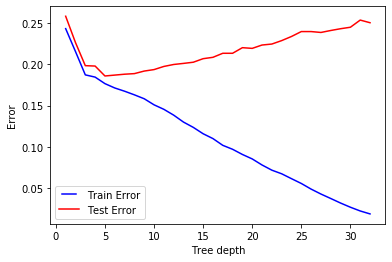

In [100]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    dtree = DecisionTreeClassifier(max_depth=max_depth,random_state=42)
    dtree.fit(X_train, Y_train)
    train_pred = dtree.predict(X_train)
   
    train_results.append(((confusion_matrix(Y_train,train_pred)[0][1]+confusion_matrix(Y_train,train_pred)[1][0])/Y_train.count()))
   

    y_pred = dtree.predict(X_test)
    
    test_results.append(((confusion_matrix(Y_test,y_pred)[0][1]+confusion_matrix(Y_test,y_pred)[1][0])/count))

from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(max_depths, train_results, 'b', label= 'Train Error')
line2, = plt.plot(max_depths, test_results, 'r', label= 'Test Error')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Error')
plt.xlabel('Tree depth')
plt.show()

In [102]:
print (test_results)
print (test_results[4])
print(min(test_results))

[0.258495290330273, 0.22654107547394778, 0.19852152140217003, 0.19804459282222486, 0.18600214617860975, 0.18707523548348634, 0.18814832478836294, 0.18886371765828067, 0.19196375342792416, 0.19375223560271848, 0.19756766424227973, 0.1999523071420055, 0.20126386073685465, 0.2026946464766901, 0.2069870036961965, 0.20865625372600452, 0.21354477167044236, 0.21354477167044236, 0.22034100393466077, 0.21950637891975677, 0.22356027184929056, 0.22475259329915345, 0.22892571837367354, 0.23393346846309765, 0.23989507571241206, 0.23989507571241206, 0.23882198640753546, 0.24120662930726125, 0.24335280791701444, 0.24514129009180874, 0.2538452366758078, 0.250625968761178]
0.18600214617860975
0.18600214617860975


Optimal max_depth value = 4

## min_sample_split

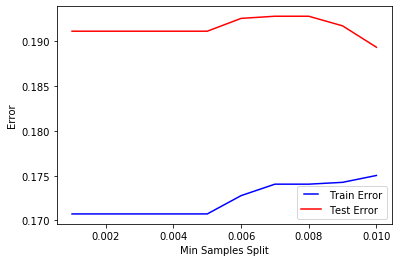

In [103]:
min_samples_splits = [0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01]#np.linspace(0.0, 0.1, 10, endpoint=True)

train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    dtree = DecisionTreeClassifier(max_depth = 10,min_samples_leaf=0.002,min_samples_split=min_samples_split,random_state=42)
    dtree.fit(X_train, Y_train)
    train_pred = dtree.predict(X_train)
   
    train_results.append(((confusion_matrix(Y_train,train_pred)[0][1]+confusion_matrix(Y_train,train_pred)[1][0])/Y_train.count()))
   

    y_pred = dtree.predict(X_test)
    
    test_results.append(((confusion_matrix(Y_test,y_pred)[0][1]+confusion_matrix(Y_test,y_pred)[1][0])/count))

from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(min_samples_splits, train_results, 'b', label= 'Train Error')
line2, = plt.plot(min_samples_splits, test_results, 'r', label= 'Test Error')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Error')
plt.xlabel('Min Samples Split')
plt.show()

Optimal min_sample_split seems to be 0.007, could cause underfitting though

## min_sample_leafs

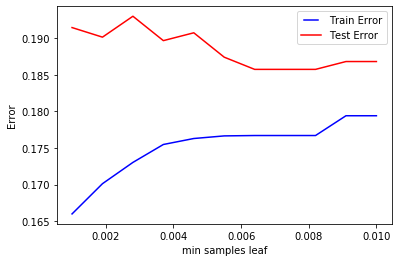

In [104]:
min_samples_leafs = np.linspace(0.001, 0.01, 11, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
    dt = DecisionTreeClassifier(max_depth = 10,min_samples_leaf=min_samples_leaf,random_state=42)
    dt.fit(X_train, Y_train)
    
    train_pred = dt.predict(X_train)
    train_results.append(((confusion_matrix(Y_train,train_pred)[0][1]+confusion_matrix(Y_train,train_pred)[1][0])/Y_train.count()))
   

    y_pred = dt.predict(X_test)
    test_results.append(((confusion_matrix(Y_test,y_pred)[0][1]+confusion_matrix(Y_test,y_pred)[1][0])/count))


line1, = plt.plot(min_samples_leafs, train_results, 'b', label= 'Train Error')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label= 'Test Error')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Error')
plt.xlabel('min samples leaf')
plt.show()

Increasing this parameter could cause overfitting

## Max Features

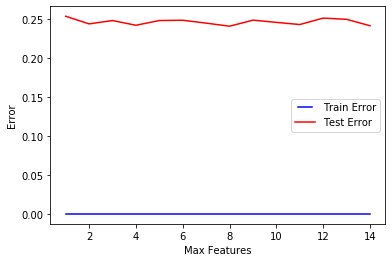

In [105]:
max_features = list(range(1,data.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
    dt = DecisionTreeClassifier(max_features=max_feature,random_state=42)
    dt.fit(X_train, Y_train)
    
    train_pred = dt.predict(X_train)
    train_results.append(((confusion_matrix(Y_train,train_pred)[0][1]+confusion_matrix(Y_train,train_pred)[1][0])/Y_train.count()))
   

    y_pred = dt.predict(X_test)
    test_results.append(((confusion_matrix(Y_test,y_pred)[0][1]+confusion_matrix(Y_test,y_pred)[1][0])/count))


line1, = plt.plot(max_features, train_results, 'b', label= 'Train Error')
line2, = plt.plot(max_features, test_results, 'r', label= 'Test Error')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Error')
plt.xlabel('Max Features')
plt.show()

# Tune RF 
## n_estimators

In [57]:
np.linspace(100, 1000, 20, endpoint=True)

array([ 100.        ,  147.36842105,  194.73684211,  242.10526316,
        289.47368421,  336.84210526,  384.21052632,  431.57894737,
        478.94736842,  526.31578947,  573.68421053,  621.05263158,
        668.42105263,  715.78947368,  763.15789474,  810.52631579,
        857.89473684,  905.26315789,  952.63157895, 1000.        ])

In [56]:
n_ests = range(100, 1000, 20, endpoint=True)
train_resultsRF = []
test_resultsRF = []
for n_est in n_ests:
    rfc = RandomForestClassifier(n_estimators=n_est, criterion='entropy')
    rfc.fit(X_train, Y_train)
    train_rfc_pred = rfc.predict(X_train)
   
    train_resultsRF.append(((confusion_matrix(Y_train,train_rfc_pred)[0][1]+confusion_matrix(Y_train,train_rfc_pred)[1][0])/Y_train.count()))
   

    y_predRF = rfc.predict(X_test)
    
    test_resultsRF.append(((confusion_matrix(Y_test,y_predRF)[0][1]+confusion_matrix(Y_test,y_predRF)[1][0])/count))

from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(max_depths, train_resultsRF, 'b', label= 'Train Error')
line2, = plt.plot(max_depths, test_resultsRF, 'r', label= 'Test Error')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Error')
plt.xlabel('Tree depth')
plt.show()

ValueError: n_estimators must be an integer, got <class 'numpy.float64'>.

In [ ]:
print (test_resultsRF)

## Max Features

In [ ]:
max_features = list(range(1,data.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
    dt = DecisionTreeClassifier(max_features=max_feature,random_state=42)
    dt.fit(X_train, Y_train)
    
    train_pred = dt.predict(X_train)
    train_results.append(((confusion_matrix(Y_train,train_pred)[0][1]+confusion_matrix(Y_train,train_pred)[1][0])/Y_train.count()))
   

    y_pred = dt.predict(X_test)
    test_results.append(((confusion_matrix(Y_test,y_pred)[0][1]+confusion_matrix(Y_test,y_pred)[1][0])/count))


line1, = plt.plot(max_features, train_results, 'b', label= 'Train Error')
line2, = plt.plot(max_features, test_results, 'r', label= 'Test Error')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Error')
plt.xlabel('Max Features')
plt.show()

# Final Decision Tree Model

In [149]:
dtree_final = DecisionTreeClassifier(max_depth = 5,min_samples_leaf=0.001,min_samples_split=0.007,random_state=42)
dtree_final.fit(X_train,Y_train)
final_predictions = dtree_final.predict(X_test)

In [150]:
print (classification_report(Y_test,final_predictions))

              precision    recall  f1-score   support

       LARGE       0.68      0.54      0.60      2168
       SMALL       0.85      0.91      0.88      6219

    accuracy                           0.81      8387
   macro avg       0.76      0.73      0.74      8387
weighted avg       0.81      0.81      0.81      8387



In [151]:
0.18814832478836294 > 0.18576368188863718


5

5

In [152]:
#error rate
test_error =  ((confusion_matrix(Y_test,final_predictions)[0][1]+confusion_matrix(Y_test,final_predictions)[1][0])/count)
print (test_error)

0.18576368188863718


# Final Random Forest Model

In [61]:
rfcFinal = RandomForestClassifier(n_estimators=100, criterion='entropy')
rfcFinal.fit(X_train, Y_train)
final_predictionsFinal = rfcFinal.predict(X_test)

In [62]:
print (classification_report(Y_test,final_predictionsFinal))

              precision    recall  f1-score   support

       LARGE       0.73      0.65      0.68      2333
       SMALL       0.89      0.92      0.91      7436

    accuracy                           0.86      9769
   macro avg       0.81      0.78      0.80      9769
weighted avg       0.85      0.86      0.85      9769



In [63]:
#error rate
test_errorRF =  ((confusion_matrix(Y_test,final_predictionsFinal)[0][1]+confusion_matrix(Y_test,final_predictionsFinal)[1][0])/count)
print (test_errorRF)

0.14238919029583377


## Compare model with normalized data to model if data is not normalized

In [199]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,A0,77516,B0,13,C0,D0,E0,F0,G0,2174,0,40,H0,SMALL
1,50,A1,83311,B0,13,C1,D1,E1,F0,G0,0,0,13,H0,SMALL
2,38,A2,215646,B1,9,C2,D2,E0,F0,G0,0,0,40,H0,SMALL
3,53,A2,234721,B2,7,C1,D2,E1,F1,G0,0,0,40,H0,SMALL
4,28,A2,338409,B0,13,C1,D3,E2,F1,G1,0,0,40,H1,SMALL


In [200]:
df = pd.get_dummies(data, columns = [1,3,4,5,6,7,8,9,13], drop_first = True)

In [201]:
X_nn = data_norm.drop(14, axis = 1)
Y_nn = data_norm[14]

In [202]:
X_train_nn, X_test_nn , Y_train_nn, Y_test_nn = train_test_split(X_nn,Y_nn, test_size = 0.3, random_state = 101)

In [254]:
dtree_nn = DecisionTreeClassifier(max_depth = 10,min_samples_leaf=0.001,min_samples_split=0.007, random_state=42)
dtree_nn.fit(X_train_nn,Y_train_nn)
predictions_nn = dtree_nn.predict(X_test_nn)

In [255]:
print (classification_report(Y_test_nn,predictions_nn))

              precision    recall  f1-score   support

       LARGE       0.78      0.58      0.66      2333
       SMALL       0.88      0.95      0.91      7436

    accuracy                           0.86      9769
   macro avg       0.83      0.76      0.79      9769
weighted avg       0.85      0.86      0.85      9769



In [256]:
#error rate
test_error_nn =  ((confusion_matrix(Y_test,predictions_nn)[0][1]+confusion_matrix(Y_test_nn,predictions_nn)[1][0])/count)
print (test_error_nn)

0.13921588698945644


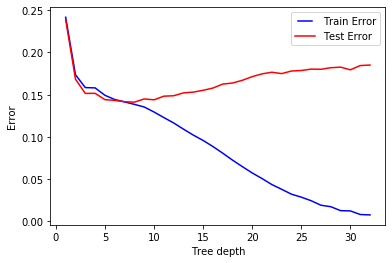

In [206]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    dtree = DecisionTreeClassifier(max_depth=max_depth,random_state=42)
    dtree.fit(X_train_nn, Y_train_nn)
    train_pred = dtree.predict(X_train_nn)
   
    train_results.append(((confusion_matrix(Y_train_nn,train_pred)[0][1]+confusion_matrix(Y_train_nn,train_pred)[1][0])/Y_train_nn.count()))
   

    y_pred = dtree.predict(X_test_nn)
    
    test_results.append(((confusion_matrix(Y_test_nn,y_pred)[0][1]+confusion_matrix(Y_test_nn,y_pred)[1][0])/count))

from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(max_depths, train_results, 'b', label= 'Train Error')
line2, = plt.plot(max_depths, test_results, 'r', label= 'Test Error')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Error')
plt.xlabel('Tree depth')
plt.show()

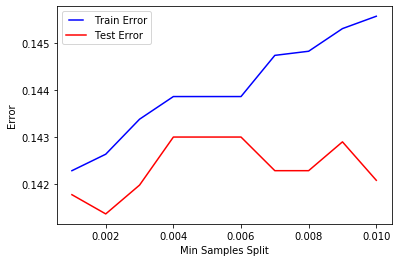

In [227]:
min_samples_splits = [0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01]#np.linspace(0.0, 0.1, 10, endpoint=True)

train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    dtree = DecisionTreeClassifier(max_depth = 7,min_samples_split=min_samples_split,random_state=42)
    dtree.fit(X_train_nn, Y_train_nn)
    train_pred = dtree.predict(X_train_nn)
   
    train_results.append(((confusion_matrix(Y_train_nn,train_pred)[0][1]+confusion_matrix(Y_train_nn,train_pred)[1][0])/Y_train_nn.count()))
   

    y_pred = dtree.predict(X_test_nn)
    
    test_results.append(((confusion_matrix(Y_test_nn,y_pred)[0][1]+confusion_matrix(Y_test_nn,y_pred)[1][0])/count))

from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(min_samples_splits, train_results, 'b', label= 'Train Error')
line2, = plt.plot(min_samples_splits, test_results, 'r', label= 'Test Error')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Error')
plt.xlabel('Min Samples Split')
plt.show()

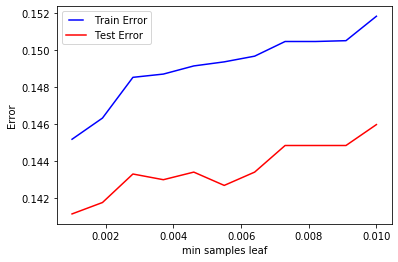

In [236]:
min_samples_leafs = np.linspace(0.001, 0.01, 11, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
    dt = DecisionTreeClassifier(max_depth = 7,min_samples_split=0.007,min_samples_leaf=min_samples_leaf,random_state=42)
    dt.fit(X_train_nn, Y_train_nn)
    
    train_pred = dt.predict(X_train_nn)
    train_results.append(((confusion_matrix(Y_train_nn,train_pred)[0][1]+confusion_matrix(Y_train_nn,train_pred)[1][0])/Y_train_nn.count()))
   

    y_pred = dt.predict(X_test_nn)
    test_results.append(((confusion_matrix(Y_test_nn,y_pred)[0][1]+confusion_matrix(Y_test_nn,y_pred)[1][0])/count))


line1, = plt.plot(min_samples_leafs, train_results, 'b', label= 'Train Error')
line2, = plt.plot(min_samples_leafs, test_results, 'r', label= 'Test Error')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Error')
plt.xlabel('min samples leaf')
plt.show()

# Compare normalized to not normalized

In [260]:
print ('Not Normalized Data Testing Error: ' + str(test_error_nn))
print ('Normalized Data Testing Error: ' + str(test_error))

Not Normalized Data Testing Error: 0.13921588698945644
Normalized Data Testing Error: 0.13921588698945644


# Classify Futures

In [219]:
futures = pd.read_csv('futures.csv',header=None)


In [220]:
# Split by categorical and numeric
futures_x = futures_final.iloc[:,[0,2,4,10,11,12]].values.astype(float)
futures_y = futures_final.iloc[:,[1,3,5,6,7,8,9,13]]

# Scale the data using min max
min_max_scaler = preprocessing.MinMaxScaler()
futures_x_scaled = min_max_scaler.fit_transform(futures_x)
futures_numeric = pd.DataFrame(futures_x_scaled)

# get dummies for all the categorical features in futures_y
cats_y = [1,3,5,6,7,8,9,13]
futures_cats = pd.get_dummies(futures, cats_y, drop_first = True)

# merge the numerical and categorical data
futures_norm = futures_numeric.merge(futures_cats, left_index= True, right_index = True)

# Data split for into labels and features
futures_X = data_norm.drop(14, axis = 1)
futures_Y = data_norm[14]

# Make the train and test splits
fut_X_train, fut_X_test , fut_Y_train, fut_Y_test = train_test_split(futures_X,futures_Y, test_size = 0.3, random_state = 101)

# Train using the final model on normalized data
futures_predictions = dtree_final.predict(X_test)

In [221]:
futures_predictions_df = pd.DataFrame(futures_predictions)

# Futures with predicted labels

In [222]:
futures_with_pred = futures.merge(futures_predictions_df,left_index = True, right_index = True)

In [223]:
futures_with_pred.head()

,0_x,1,2,3,4,5,6,7,8,9,10,11,12,13,0_y
0,38,A0,89814,B1,9,C1,D1,E1,F1,G0,0,0,50,H0,SMALL
1,28,A1,336951,B2,12,C1,D2,E1,F1,G0,0,0,40,H0,SMALL
2,44,A0,160323,B3,10,C1,D0,E1,F0,G0,7688,0,40,H0,SMALL
3,18,?,103497,B3,10,C0,?,E0,F1,G1,0,0,30,H0,SMALL
4,63,A3,104626,B5,15,C1,D5,E1,F1,G0,3103,0,32,H0,LARGE
